# HRRR Plot Templates for matplotlib
Brian Blaylock  
September 27, 2017

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import numpy as np

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2/')
from BB_downloads.HRRR_S3 import get_hrrr_variable
from BB_basemap.draw_maps import draw_CONUS_HRRR_map

In [7]:
# Set up things we will reuse
DATE = datetime(2017, 9, 25, 0)

# Make map object
m = draw_CONUS_HRRR_map()

### 700 MB Temperature

In [9]:
H = get_hrrr_variable(DATE, variable='TMP:700 mb')

./temp_2017092500_f00_TMP.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 17:10032923:d=2017092500:TMP:700 mb:anl

range: 10032923 10581986


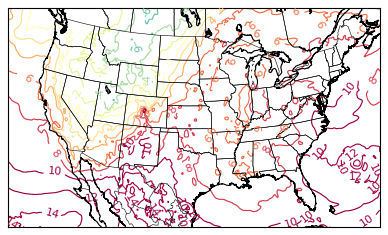

In [11]:
CS = m.contour(H['lon'], H['lat'], H['value']-273.15, 
                latlon=True,
                levels=range(-30,30,2),
                cmap='Spectral_r', vmin=-10, vmax=10)
plt.clabel(CS, inline=1, fmt='%2.f')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

### Simulated Composite Reflectivity

In [12]:
H = get_hrrr_variable(DATE, variable='REFC:entire')

./temp_2017092500_f00_REF.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 1:0:d=2017092500:REFC:entire atmosphere:anl

range: 0 456265


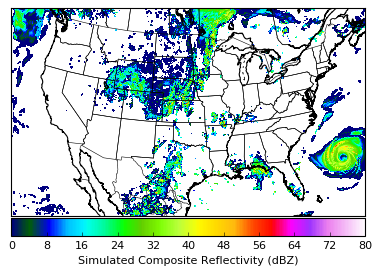

In [23]:
dBZ = H['value']
dBZ = np.ma.array(dBZ)
dBZ[dBZ == -10] = np.ma.masked
m.pcolormesh(H['lon'], H['lat'], dBZ, cmap='gist_ncar', vmax=80, vmin=0, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label('Simulated Composite Reflectivity (dBZ)')

m.drawcoastlines()
m.drawcountries()
m.drawstates()


### 500 mb Heights

In [24]:
H = get_hrrr_variable(DATE, variable='HGT:500 mb')

./temp_2017092500_f00_HGT.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 11:5941543:d=2017092500:HGT:500 mb:anl

range: 5941543 6636196


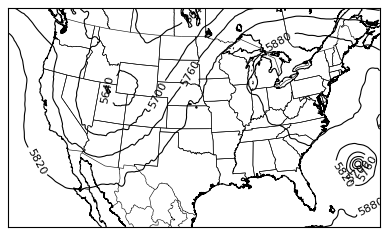

In [39]:
CS = m.contour(H['lon'], H['lat'], H['value'], 
                latlon=True,
                levels=range(5040, 6181, 60),
                colors='k')
plt.clabel(CS, inline=1, fmt='%2.f')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

### Sea Level Pressure

In [40]:
H = get_hrrr_variable(DATE, variable='MSLMA:mean sea level')

./temp_2017092500_f00_MSL.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 37:22828901:d=2017092500:MSLMA:mean sea level:anl

range: 22828901 23445628


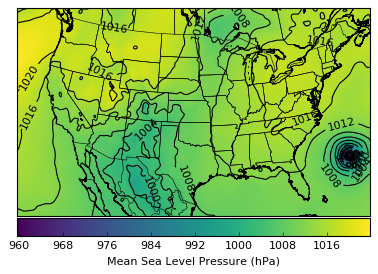

In [52]:
CS = m.contour(H['lon'], H['lat'], H['value']/100., 
               latlon=True,
               levels=range(952, 1200, 4),
               colors='k')
plt.clabel(CS, inline=1, fmt='%2.f')

m.pcolormesh(H['lon'], H['lat'], H['value']/100., 
               latlon=True, cmap='viridis')

cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label('Mean Sea Level Pressure (hPa)')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

### 2 m Temperature

In [53]:
H = get_hrrr_variable(DATE, variable='TMP:2 m')

./temp_2017092500_f00_TMP.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 54:33406920:d=2017092500:TMP:2 m above ground:anl

range: 33406920 34679071


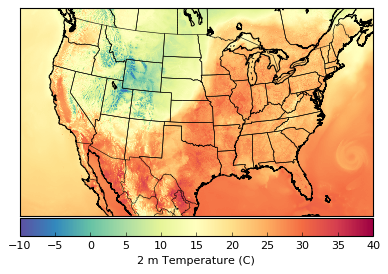

In [56]:
m.pcolormesh(H['lon'], H['lat'], H['value']-273.15, 
             latlon=True, cmap='Spectral_r',
             vmax=40, vmin=-10)

cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label('2 m Temperature (C)')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

### Precipitation

In [57]:
H = get_hrrr_variable(DATE, variable='APCP:surface', fxx=1)

./temp_2017092500_f01_APC.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 64:47262831:d=2017092500:APCP:surface:0-1 hour acc fcst

range: 47262831 47734896


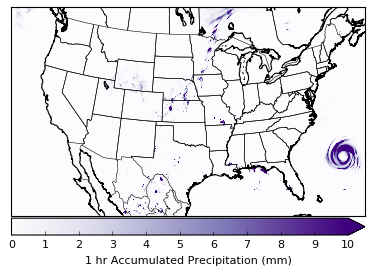

In [61]:
m.pcolormesh(H['lon'], H['lat'], H['value'], 
             latlon=True, cmap='Purples',
            vmax=10, vmin=0)

cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95, extend='max')
cb.set_label('1 hr Accumulated Precipitation (mm)')

m.drawcoastlines()
m.drawcountries()
m.drawstates()